<a href="https://colab.research.google.com/github/Jenniferli6/XAI_Interpretable_ML/blob/main/XAI_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #02
### Interpretable ML
#### Jennifer Li


In this assignment, we will work with a dataset from a telecommunications company (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). The company is interested in understanding the factors that contribute to customer churn (customers leaving the company for a competitor) and developing interpretable models to predict which customers are at risk of churning.

**Tasks**

1. Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

2. Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

3. Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

4. Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

5. Model Comparison: Compare the performance and interpretability of the different models we built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.


In [57]:
# Clone GitHub files to colab workspace
!git clone https://github.com/Jenniferli6/XAI_Interpretable_ML.git
%cd XAI_Interpretable_ML
!ls

fatal: destination path 'XAI_Interpretable_ML' already exists and is not an empty directory.
/content/XAI_Interpretable_ML/XAI_Interpretable_ML
README.md		  XAI_Interpretable_ML
Telco-Customer-Churn.csv  XAI_Interpretable_ML.ipynb


In [58]:
!pip install pygam

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_reset, acorr_ljungbox, normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols, logit
from statsmodels.stats.stattools import durbin_watson

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as SkLogistic
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import scipy.stats as stats
from scipy.stats import chi2_contingency, jarque_bera, shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from pygam import LogisticGAM, s, f

In [60]:
url = 'https://github.com/Jenniferli6/XAI_Interpretable_ML/raw/refs/heads/main/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Exploratory Data Analysis

In [61]:
print(f'Data Dimensions: {df.shape}')
print(f'Data Types: \n{df.dtypes}')

Data Dimensions: (7043, 21)
Data Types: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [62]:
print(f'Missing Values: \n{df.isnull().sum()}')

Missing Values: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [63]:
print(f'Duplicated Rows: {df.duplicated().sum()}')

Duplicated Rows: 0


In [64]:
print(f'Unique Values: \n{df.nunique()}')

Unique Values: 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


There are 7043 observations, each represents relevant data of a customer.

There are 21 variables, covering customers' demographic information (e.g. gender, partners, dependents), account information (e.g. tenure, contract, payment, etc), services (e.g. phone, internet, streaming TV and movies, etc),

The dataset is pretty clean, no duplicated rows, no missing values.

However, I find that TotalCharges means "The total amount charged to the customer", which should be similar to MonthlyCharges being a float64 instead of being an object.

Also, SeniorCitizen only has 2 values, 1 and 0, meaning if the customer is a senior citizen, so it is more like a categorical variable.

Therefore, I'm going to change these 2 variables' data type.

In [65]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")
print(f'Data Types: \n{df.dtypes}')

Data Types: 
customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


In [66]:
print(f'Summary Statistics: \n{df.describe()}')

Summary Statistics: 
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


Among 21 variables, there are 3 numeric variables: SeniorCitizen, tenure, MonthlyCharges.

For tenure, its mean is 32.4 months, which is the average tiime of customers staying with this company. The shortest period is 0, and the longest period is 72 months, half of customers stay 29 months.

For MonthlyCharges, it ranges from $18.25 to $118.75, with standard deviation being $30.1. Half charges clustered around $35.5-$89.9.

For TotalCharges, the average customer spending in total is $2283, and its std is $2266.8, showing very great dispersion in data. However, I also find there are 11 values missing, therefore I want to see which rows have this issue.


In [67]:
df_tot_missing = df[df["TotalCharges"].isnull()]
print(df_tot_missing)


      customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female             0     Yes        Yes       0   
753   3115-CZMZD    Male             0      No        Yes       0   
936   5709-LVOEQ  Female             0     Yes        Yes       0   
1082  4367-NUYAO    Male             0     Yes        Yes       0   
1340  1371-DWPAZ  Female             0     Yes        Yes       0   
3331  7644-OMVMY    Male             0     Yes        Yes       0   
3826  3213-VVOLG    Male             0     Yes        Yes       0   
4380  2520-SGTTA  Female             0     Yes        Yes       0   
5218  2923-ARZLG    Male             0     Yes        Yes       0   
6670  4075-WKNIU  Female             0     Yes        Yes       0   
6754  2775-SEFEE    Male             0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753      

I find that for these rows whose TotalCharge is missing, their tenure is 0, but MonthlyCharge has value. So maybe the missing Totalcharge value is due to the tenure being 0. To verify my guess, I want to see if there exists a scenario that tenure being 0 but TotalCharge is not missing. Therefore, I want to count the number of rows whose tenure is 0.

In [68]:
df[df['tenure'] == 0].shape

(11, 21)

The result above shows that the number of rows whose tenure is also 11. Therefore, I think the missing reason of TotalCharges is highly likely due to the tenure being 0. However, I also find that the relationship between TotalCharges and tenure, MonthlyCharge is not multiplication. Considering the missing values in TotalCharges only account for 0.16% of total rows, very minor, I'll drop the rows whose TotalCharges is missing.

In [69]:
df = df.dropna()
df.shape

(7032, 21)

### Relationship between features and target variable

Next, I want to explore the relationships between different features and the target variable (churn).

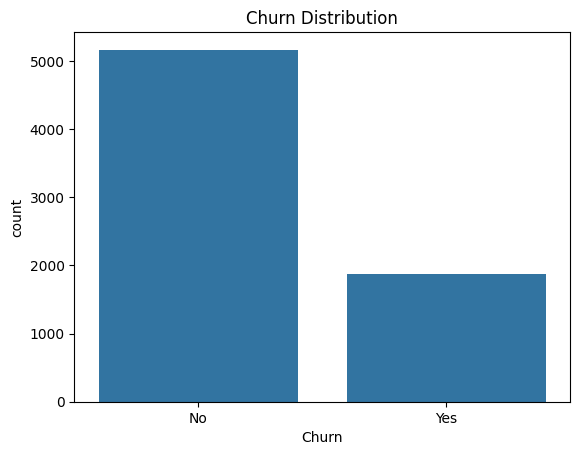

In [70]:
# Target variable distribution

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

Considering numerical and categorical variables have different treatment in visualization and statisticaly analysis, I'll divide the variables into 2 groups first.

In [71]:
num_var = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_var

['tenure', 'MonthlyCharges', 'TotalCharges']

In [72]:
cat_var = df.select_dtypes(include=['object','category']).columns.tolist()
cat_var

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [73]:
# I want to get a feature list, so need to drop Churn in cat_var list because Churn is our target variable

cat_var.remove('Churn')
cat_var

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [74]:
# Since each customer has a unique ID, so customerID is not a valide categorical variable, shall be removed as well

cat_var.remove('customerID')
cat_var

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

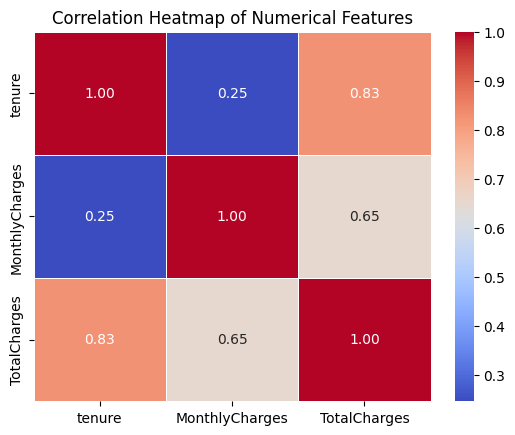

In [75]:
# For Numerical Features with Target Variable

sns.heatmap(df[num_var].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



Based on this heatmap for numerical features, we can see that there is a strong positive relationship between tenure and totalcharges (0.83 correlation), moderately positive relationship between monthlycharge and totalcharge (0.65 correlation).

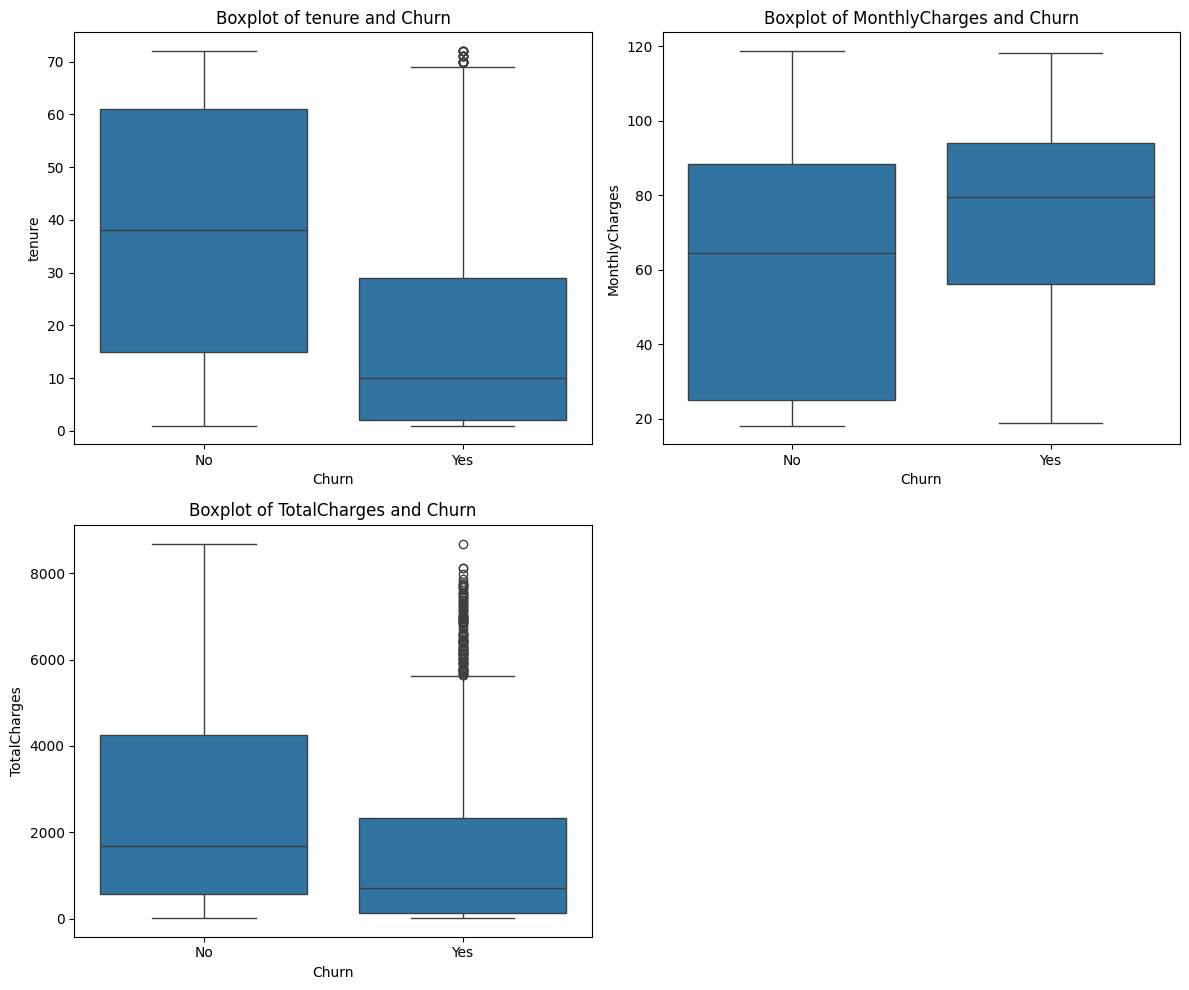

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_var[:4]):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} and Churn')

for j in range(i+1, len(axes)):  # Remove extra subplot when num_var < total slots
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the above boxplots, we can see that for customers who churn, they tend to have much lower tenure and lower total charges, which makes sense since generally new customers have low switching costs and more likely to leave if the products do not meet their expectations, leading to low total costs.

Further, we can find that the customers who churn tend to have higher monthly charges than those who stay with the company. Therefore, the monthly charge might be an important factor influencing if a customer would like to stay.

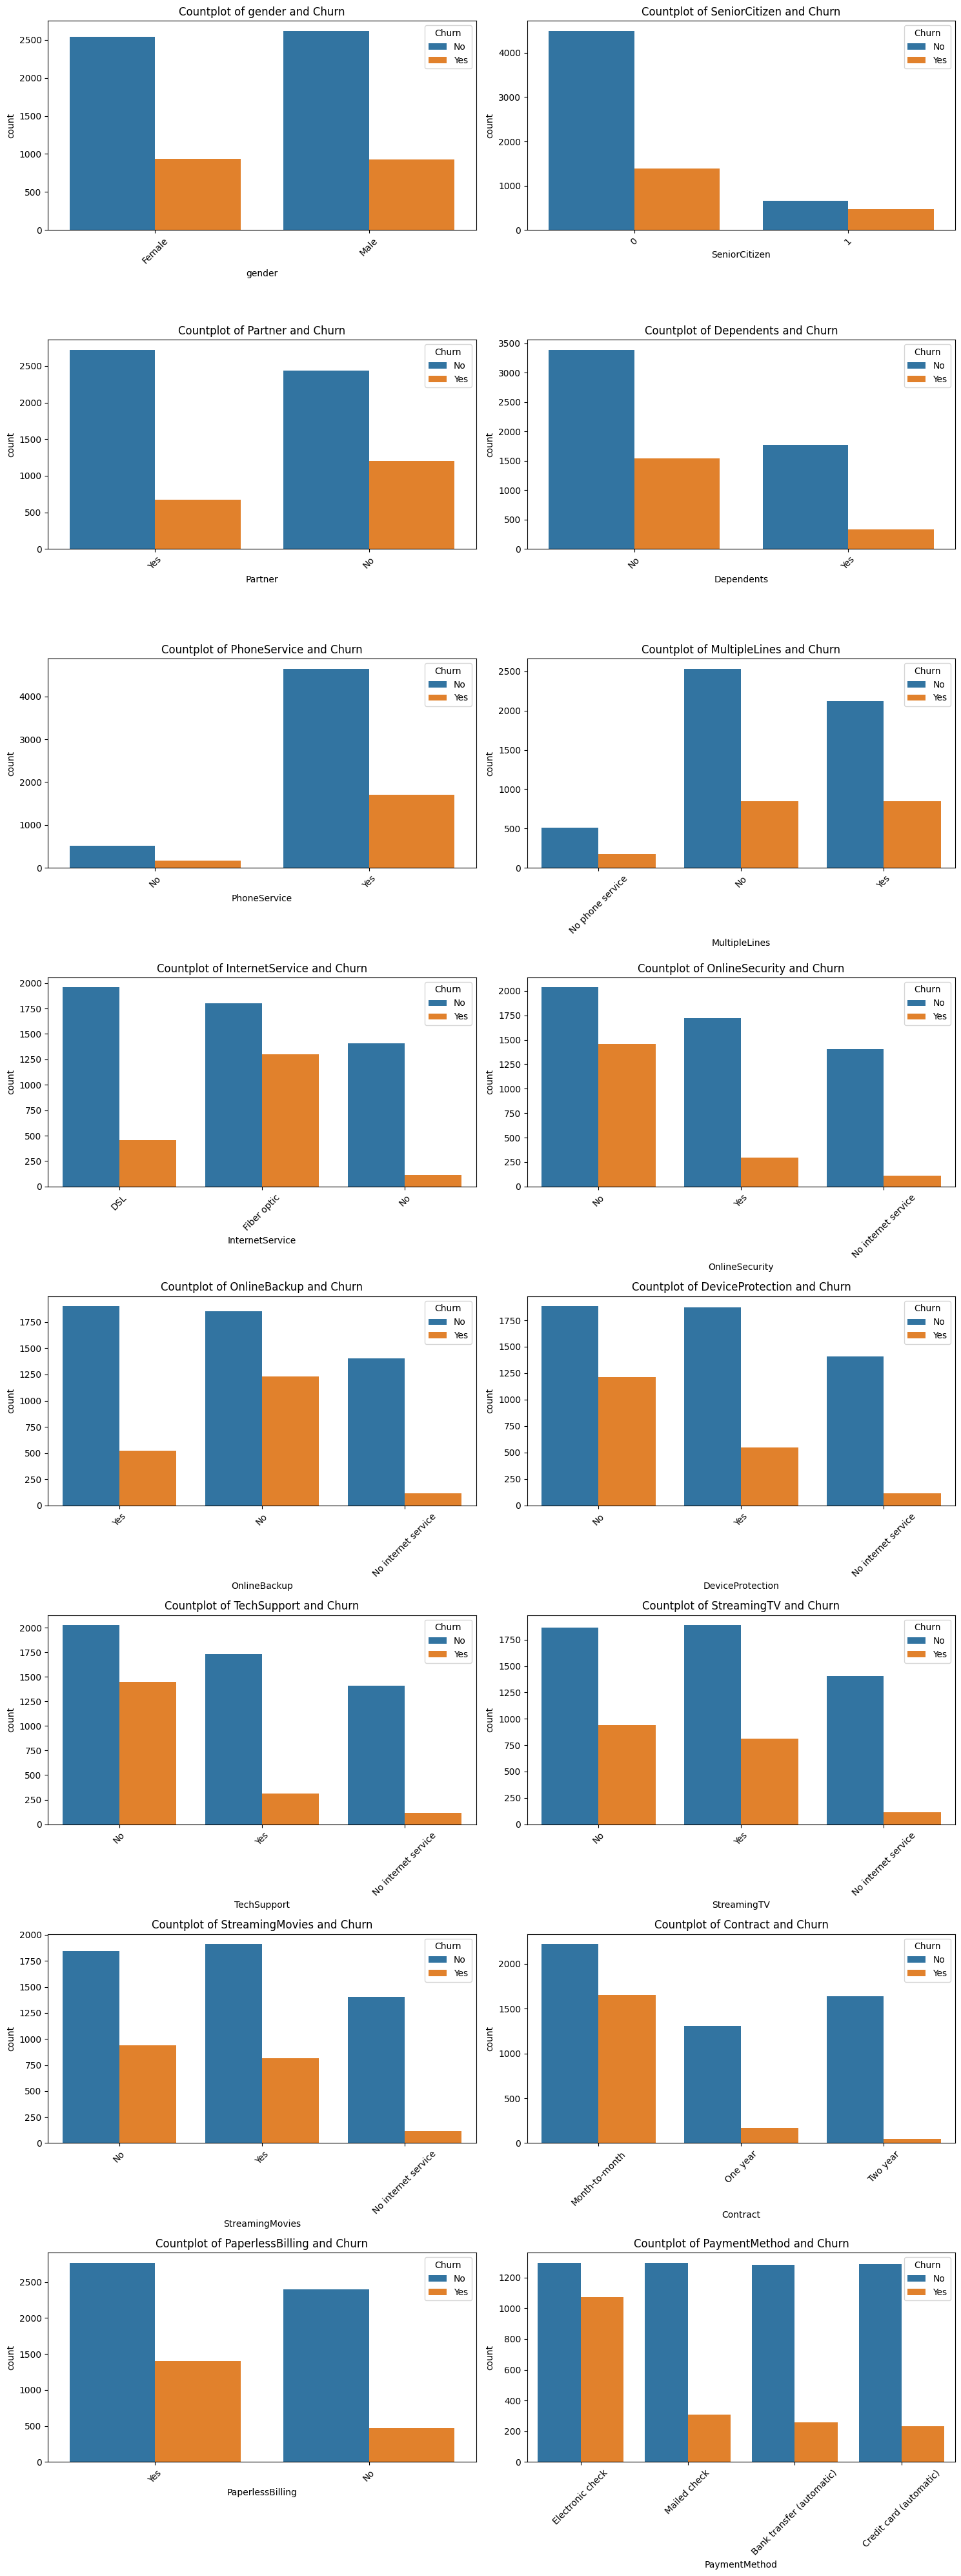

In [77]:
# For categorical features

fig, axes = plt.subplots(8, 2, figsize=(15, 40))
axes = axes.flatten()

for i, col in enumerate(cat_var):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col} and Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Based on the above 16 countplots, we can see that customers with different demographics, service subscriptions, and billing methods show different churn situations.

From demographcis perspective, gender is not a key predictor in churn since men and women show similar churn. However, for those who have a partner or dependents, they churn less. Also, senior citizens show higher churn rate compared to non senior citizens.

From service perspective:
*   MultipleLines: customers who have multiplelines tend to churn slightly more than those who don't have.
*   InternetServices: Fiber optic customers churn much more than DSL and non internetservice users.
*   OnlineSecurity/OnlineBackup/DeviceProtection/TechSupport: Customers who don't have these services tend to churn more.
*   StreamingTV/StreamingMovies: there is no obvious churn difference between customers who have these services and who don't, althought the "No internet service" group show very low churn.

From payment perspective, customers who have monthly contract show much more churn than the annual contract or biannual contract customers. Additionally, customers who use paperless billing or electronic check tend to churn more.




## 2 Model Assumption Checks

I'll use some visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

Below list 11 common assumptions of regression model, some of them only applicable to specific models not all of the 3 models:
1. Linearity  
2. Independence  
3. Homoscedasticity  
4. Normality  
5. No multicollinearity  
6. No autocorrelation  
7. No endogeneity  
8. Correct specification
9. No influential outliers  
10. Large sample size

### 2.1 Linear Regression Assumption Check


In [78]:
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,category
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [79]:
cat_var

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [80]:
num_var

['tenure', 'MonthlyCharges', 'TotalCharges']

In [81]:
# Prepare data for linear regression
X_linear = df[cat_var + num_var].copy()
y_linear = df['Churn_num'].copy()

# One-hot encode categorical variables
X_linear_encoded = pd.get_dummies(X_linear, columns=cat_var, drop_first=True)
print(X_linear_encoded.dtypes)

X_linear_encoded = sm.add_constant(X_linear_encoded)


tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
SeniorCitizen_1                             bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

In [82]:
# Convert boolean columns to integers, for subsequent model analysis
for col in X_linear_encoded.select_dtypes(include='bool').columns:
    X_linear_encoded[col] = X_linear_encoded[col].astype(int)

print(X_linear_encoded.dtypes.value_counts())

int64      28
float64     3
Name: count, dtype: int64


In [83]:
# Fit linear regression model
linear_model = sm.OLS(y_linear, X_linear_encoded).fit()
print("Linear Regression Model Summary:")
print(linear_model.summary())

Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Churn_num   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:58:54   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [84]:
# Check statistically significant variables

results = pd.DataFrame({
    "Variable": linear_model.params.index,
    "Coefficient": linear_model.params.values,
    "P_value": linear_model.pvalues.values
})

# Filter variables with p < 0.05
significant_vars = results[results["P_value"] < 0.05]

print(significant_vars)

                          Variable  Coefficient       P_value
0                            const     0.273694  7.872484e-03
1                           tenure    -0.001963  9.041291e-05
3                     TotalCharges    -0.000044  7.922000e-12
5                  SeniorCitizen_1     0.044452  6.314942e-04
9   MultipleLines_No phone service     0.139609  5.068991e-22
10               MultipleLines_Yes     0.058661  1.627875e-02
25               Contract_One year    -0.105639  4.942984e-14
26               Contract_Two year    -0.070010  4.007471e-05
27            PaperlessBilling_Yes     0.044907  7.060487e-06
29  PaymentMethod_Electronic check     0.067565  3.756019e-07


The OLS Regression Results show us that our linear regression model can approximately **explain 28% of the variation in churn (R-squared & Adj. R-squared: 0.28)**, which is relativel low. The overall **F-statistic** was highly significant (Prob (F-statistic) < 0.05), meaning the model is overally statistically meaningful.

Looking at the **coefficients**, there are several important predictors, which are filtered out in "significant_vars". Based on this filtered result, we can see that the key predictors are **consistent with the results in previous EDA**.
* Customers who are SeniorCitizen, having Paperless billing method or using Electronic Check have significantly positive coefficients, pointing to a higher churn tendency within those groups.
* Some service-related features (e.g. No phone service, MultipleLines_Yes) showed positive but weaker associations with churn, meanhing customers who have multiplelines tend to churn slightly more than those who don't have.
* From contract length perspective, customers with longer contracts are substantially less likely to churn compared to those on month-to-month contracts.

Looking at the diagnostic test table, the overall results are not good, **several assumptions are violated**.
* Both the **Omnibus test** and the **Jarque–Bera test** were highly significant (p < 0.001), showing that residuals are **not normally distributed**. This is supported by the **skew (0.55)**, indicating a mild right skew, and **kurtosis** (2.68), which suggests the distribution is slightly flatter than normal.
* On the positive side, the **Durbin–Watson statistic (≈2.0)** falls in the acceptable range, indicating **no serious autocorrelation** problem in the residuals. However, the **condition number (1.39e+18** is extremely large, confirming **severe multicollinearity** or redundant predictors.


### Linearity & Homoscedasticity Check

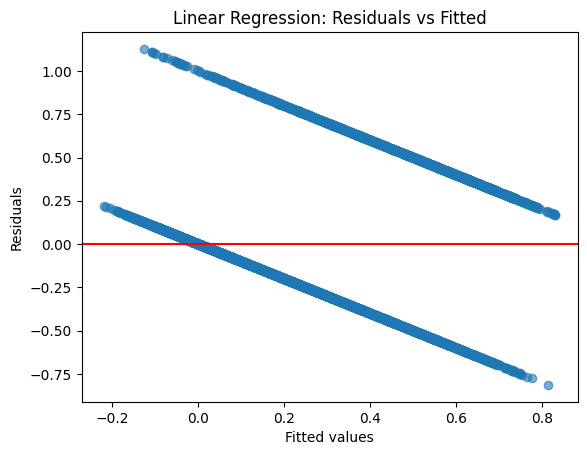

In [85]:
# Residuals vs Fitted (Linearity & homoscedasticity assumption check)

resid = linear_model.resid
fitted = linear_model.fittedvalues

plt.scatter(fitted, resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='-')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals vs Fitted")
plt.show()

The residuals vs fitted plot show the violations of both linearity and homoscedasticity assumptions. Ideally, residuals should be evenly dispersed above and below the zero residual reference line without visible pattern, because the systematic relationships have been captured by the model.

However, in our case, the residuals form two distinct parallel bands, meaning that our model systematically underestimates or overestimates churn for different ranges of fitted values.

Since the relationship between predictors and churn is not linear, so linearity assumption is violated. Also, because residuals don't have constant variance, so the homoscedasticity assumption is violated as well.

In [86]:
# Homoscedasticity additional tests
bp_stat, bp_p, _, _ = het_breuschpagan(resid, X_linear_encoded)
white_stat, white_p, _, _ = het_white(resid, X_linear_encoded)
print("Breusch–Pagan p-value:", bp_p)
print("White test p-value:", white_p)


Breusch–Pagan p-value: 1.4942610720595528e-269
White test p-value: 5.493517042516665e-223


Both Breusch–Pagan and White test measure homoscedasticity assuming that residuals are homoscedastic. Based on the result, their p-values are so small, far below 0.05, therefore we reject the null hypothesis of homoscedasticity, meaning that our model’s residuals do not have constant variance.

### Normality Check

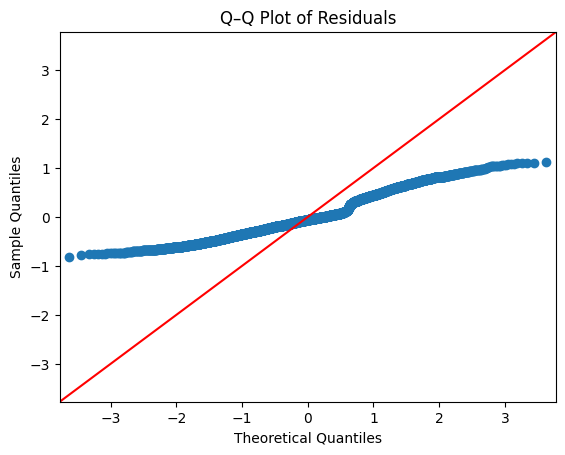

Anderson–Darling normality p-value: 0.0


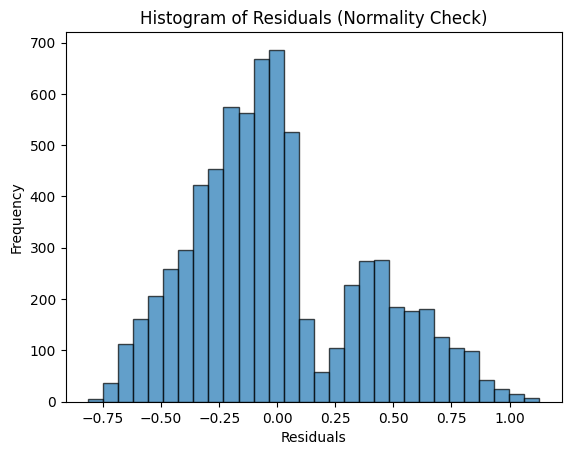

In [87]:
# Normality

# QQ Plot
sm.qqplot(resid, line='45')
plt.title("Q–Q Plot of Residuals")
plt.show()
print("Anderson–Darling normality p-value:", normal_ad(resid)[1])


# Histogram of residuals
plt.hist(resid, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Normality Check)")
plt.show()


The Q-Q Plot shows that the points deviate obviously from the red 45° line, especially in the middle and tails, indicating that the residuals are not normally distributed.

The Histogram shows two peaks instead of a smooth, bell-shaped curve, a clear deviation from normality, which double confirms the previous analysis about normality in OLS Regression Results and Q-Q Plot.

### Multicollinearity Check

In [88]:
# Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X_linear_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_linear_encoded.values, i)
                   for i in range(X_linear_encoded.shape[1])]
print(vif_data)

                                  feature         VIF
0                                   const    0.000000
1                                  tenure    7.584453
2                          MonthlyCharges  866.089640
3                            TotalCharges   10.811490
4                             gender_Male    1.002106
5                         SeniorCitizen_1    1.153220
6                             Partner_Yes    1.462988
7                          Dependents_Yes    1.381598
8                        PhoneService_Yes         inf
9          MultipleLines_No phone service         inf
10                      MultipleLines_Yes    7.289761
11            InternetService_Fiber optic  148.500814
12                     InternetService_No         inf
13     OnlineSecurity_No internet service         inf
14                     OnlineSecurity_Yes    6.338349
15       OnlineBackup_No internet service         inf
16                       OnlineBackup_Yes    6.796678
17   DeviceProtection_No int

The VIF results reveal that our model has severe multicollinearity problem. Many service-related dummy variables have infinite VIFsm (e.g. PhoneService_Yes, No internet service), indicating some variables being redundant.

In addition, MonthlyCharges and TotalCharges are highly correlated, as expected, leading to extremely large VIF values.

These results confirm that the linear regression model is poorly specified and suffers from multicollinearity, which undermines the reliability of individual coefficient estimates.

### Autocorrelation & Independence Check

In [89]:
# Autocorrelation & Independence
print("Durbin–Watson:", durbin_watson(resid))
print("Ljung–Box:", acorr_ljungbox(resid, lags=[10], return_df=True))

Durbin–Watson: 2.0043473189317385
Ljung–Box:       lb_stat  lb_pvalue
10  13.898809   0.177657


In Durbin–Watson Statistic test, our result (2.00) is very close to ideal value 2, so there is no evidence of autocorrelation in the residuals.

In Ljung–Box Test, p value is 0.178, greater than 0.05, double confirming that there is no significant autocorrelation in the residuals.

Therefore, residuals are independent and free from autocorrelation, and the independence assumption is satisfied for our regression model.

### Endogeneity Check

* Endogeneity occurs when a regressor correlates with the error term (Cov(X, ε) ≠ 0), commonly due to omitted variable bias (missing but relevant factors), measurement error, or simultaneity/reverse causality (the firm changes X in response to anticipated churn Y, while X also affects Y).

* Establishing exogeneity usually requires both strong domain knowledge and access to richer data sources. In our case, we are working with an observational, cross-sectional telco churn dataset. Given these limitations, we do not find evidence of this violation.


### Correct Specification Check

In [90]:
# Correct Specification
print("Ramsey RESET p-value:", linear_reset(linear_model, use_f=True).pvalue)


Ramsey RESET p-value: 2.1875245544545388e-46


Since the p-value in Ramsey RESET Test is extremely small (close to 0), we reject the null hypothesis, meaning that the model is likely misspecified.

### Summmary of Assumption Checks

It seems that many major assumptions such as linearity, homoscedasticity, normality, and correct specification are violated. And there exist severe multicollinearity in variables, making coefficient estimation difficult. It might mean that linear regression is not appropriate here, we should check logistic or GAM to see if the results will improve.



## 2.2 Logistic Regression Assumption Check

Since some variables such as “No internet service,” “No phone service” are fully determined by other variables (InternetService, PhoneService), keeping them creates perfect multicollinearity and prevents the logistic model from fitting.

Therefore, I need to address this perfect multicollinearity issue first.

In [91]:
cols_to_drop = vif_data[vif_data["VIF"] == float('inf')]["feature"].tolist()
print(cols_to_drop)

['PhoneService_Yes', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


In [92]:
# Drop columns with infinite VIF
X_logit_encoded_cleaned = X_linear_encoded.drop(columns=cols_to_drop)


In [93]:
# Add constant and convert boolean to integer
X_logit_encoded_cleaned = sm.add_constant(X_logit_encoded_cleaned)
y_logit = df['Churn'].map({'Yes': 1, 'No': 0}).copy()

for col in X_logit_encoded_cleaned.select_dtypes(include='bool').columns:
    X_logit_encoded_cleaned[col] = X_logit_encoded_cleaned[col].astype(int)



In [94]:
# Recalculate VIF to check for any remaining infinite VIF
vif_data_cleaned = pd.DataFrame()
vif_data_cleaned["feature"] = X_logit_encoded_cleaned.columns
vif_data_cleaned["VIF"] = [variance_inflation_factor(X_logit_encoded_cleaned.values, i) for i in range(X_logit_encoded_cleaned.shape[1])]

# Print columns with infinite VIF (if any)
infinite_vif_cols = vif_data_cleaned[vif_data_cleaned["VIF"] == float('inf')]["feature"].tolist()
if infinite_vif_cols:
    print(f"Columns with infinite VIF: {infinite_vif_cols}")
else:
    print("No infinite VIF columns are detected after cleaning")

No infinite VIF columns are detected after cleaning


In [95]:
# Fit the logistic model with cleaned data
logit_model = sm.Logit(y_logit, X_logit_encoded_cleaned).fit()
print("Logistic Regression Model Summary:")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.419697
         Iterations 8
Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7010
Method:                           MLE   Df Model:                           21
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2752
Time:                        21:59:07   Log-Likelihood:                -2951.3
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const              

Based on this logistic regression table, we can see that tenure and contract type are the strongest predictors of churn—each extra month of tenure lowers churn risk (coef ≈ –0.05), and a two-year contract cuts churn odds by almost 80% (coef ≈ –1.50).

Service quality also matters: fiber optic users are more likely to churn (coef ≈ 0.47), while having online security or tech support reduces churn (coefs ≈ –0.36). In addition, billing and payment methods play a role—paperless billing (coef ≈ 0.40) and electronic check payments (coef ≈ 0.36) increase churn odds.

By contrast, we find that basic demographics such as gender or partner status have little effect once other factors are controlled.

### Linearity Check

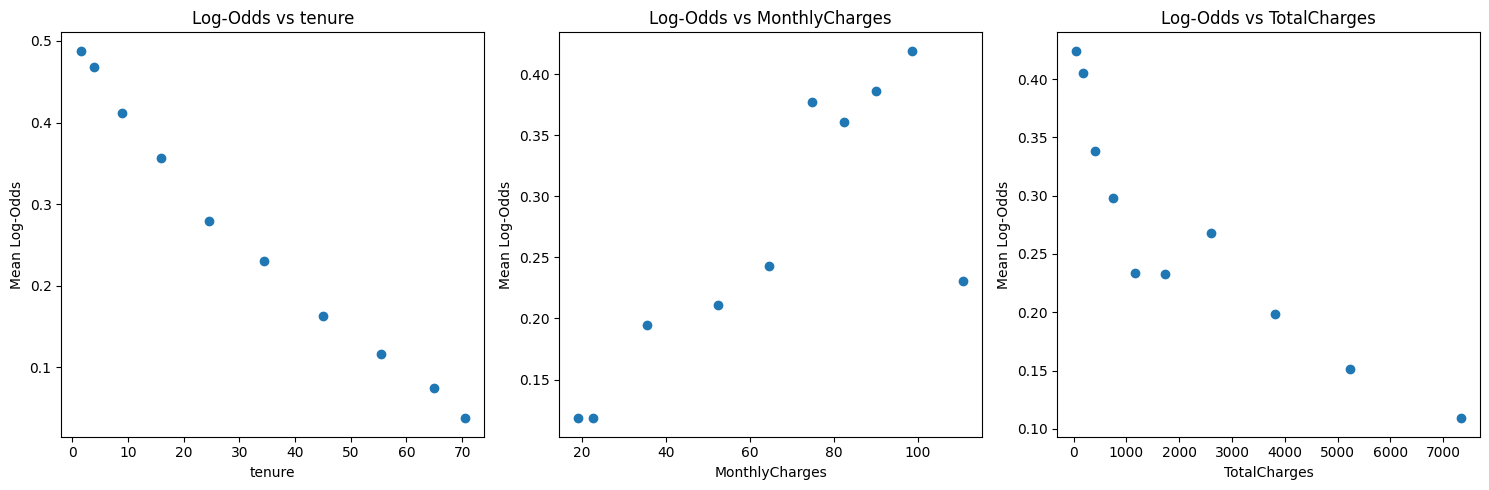

In [96]:
# Linearity of Log-Odds

plt.figure(figsize=(15, 5))

for i, var in enumerate(num_var, 1):
    plt.subplot(1, 3, i)
    # Bin the continuous variable and compute the mean log-odds
    df['log_odds'] = logit_model.predict(X_logit_encoded_cleaned)
    df_grouped = df.groupby(pd.qcut(df[var], 10))['log_odds'].mean()
    plt.scatter(df_grouped.index.categories.mid, df_grouped.values)
    plt.xlabel(var)
    plt.ylabel('Mean Log-Odds')
    plt.title(f'Log-Odds vs {var}')

plt.tight_layout()
plt.show()

* Log-Odds vs tenure: The plot shows a clear downward trend, suggesting a linear relationship, where longer tenure is associated with a decreasing likelihood of churn (log-odds).

* Log-Odds vs MonthlyCharges: The plot exhibits a slight upward trend, but the relationship appears less consistent, with more scatter around the mean, indicating a weak linear relationship.

* Log-Odds vs TotalCharges: The plot shows a downward trend as TotalCharges increases, with some variability, suggesting potential non-linearity.


### Independence Check

According to the Durbin–Watson Statistic test and Ljung–Box Test in Linear Regression Assumption Check Analysis, we can know that the residuals are independent and free from autocorrelation, and the independence assumption is satisfied for our regression model.

### Multicollinearity Check

We've already addressed infinite VIF (perfect multicollinearity) by dropping problematic columns, now check the remaining predictors.

In [97]:
# Multicollinearity
print("VIF for remaining predictors:")
print(vif_data_cleaned)

VIF for remaining predictors:
                                  feature        VIF
0                                   const  36.498367
1                                  tenure   7.548716
2                          MonthlyCharges  18.168780
3                            TotalCharges  10.706800
4                             gender_Male   1.001801
5                         SeniorCitizen_1   1.148782
6                             Partner_Yes   1.462506
7                          Dependents_Yes   1.380259
8                       MultipleLines_Yes   1.646715
9             InternetService_Fiber optic   6.997820
10                     OnlineSecurity_Yes   1.676218
11                       OnlineBackup_Yes   1.626594
12                   DeviceProtection_Yes   1.680664
13                        TechSupport_Yes   1.735336
14                        StreamingTV_Yes   2.188547
15                    StreamingMovies_Yes   2.187888
16                      Contract_One year   1.584072
17              

After dropping infinite VIF values, now most variables' VIF values range between 1.148782 and 6.997820, which are generally acceptable. However, MonthlyCharges and TotalCharges show strong correlation, likely due to their conceptual relationship (total charges accumulate from monthly charges over tenure).

The VIF for the constant term (36.498367) is unusual and may reflect model specification issues, but it is less critical than predictor VIFs.

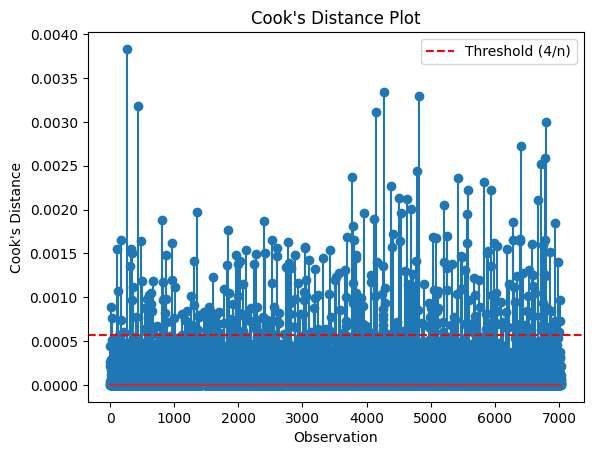

Number of influential points: 354


In [98]:
# No influential outliers

# Compute influence measures
influence = logit_model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.stem(np.arange(len(cooks_d)), cooks_d)
plt.axhline(y=4/len(cooks_d), color='r', linestyle='--', label='Threshold (4/n)')
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

# Identify influential points
influential = np.where(cooks_d > 4/len(cooks_d))[0]
print(f"Number of influential points: {len(influential)}")


The plot displays Cook's Distance values for each of the 7032 observations. Cook's Distance measures the influence of each observation on the fitted model, with higher values indicating greater influence. There is a red dashed line representing the threshold of 4/n, where n is the sample size (4/7032).

Based on this plot, we can see that the majority of Cook's Distance values are below the threshold, indicating that most observations have minimal influence. But there are several points exceeding the threshold, showing significant impact on the model.


### Large Sample Size Check

We have 7032 observations and 21 predictors, the sample size is sufficient for logistic regression

## 2.3 GAM Assumption Check

### Independence Check

Already checked earlier in the linear/logistic checks (Durbin–Watson ≈ 2, Ljung–Box p > 0.05). For GAM, independence holds since the dataset is cross-sectional (customers are independent, not time-series).

### Multicollinearity Check

After addressed the perfect multicollinearity issue in logistic regression. Now, most variables' VIF values range between 1.148782 and 6.997820, which are generally acceptable. However, MonthlyCharges and TotalCharges show strong correlation, likely due to their conceptual relationship (total charges accumulate from monthly charges over tenure).

The VIF for the constant term (36.498367) is unusual and may reflect model specification issues, but it is less critical than predictor VIFs.

### Large Sample Size Check

We have 7032 observations and 21 predictors, the sample size is sufficient for logistic regression

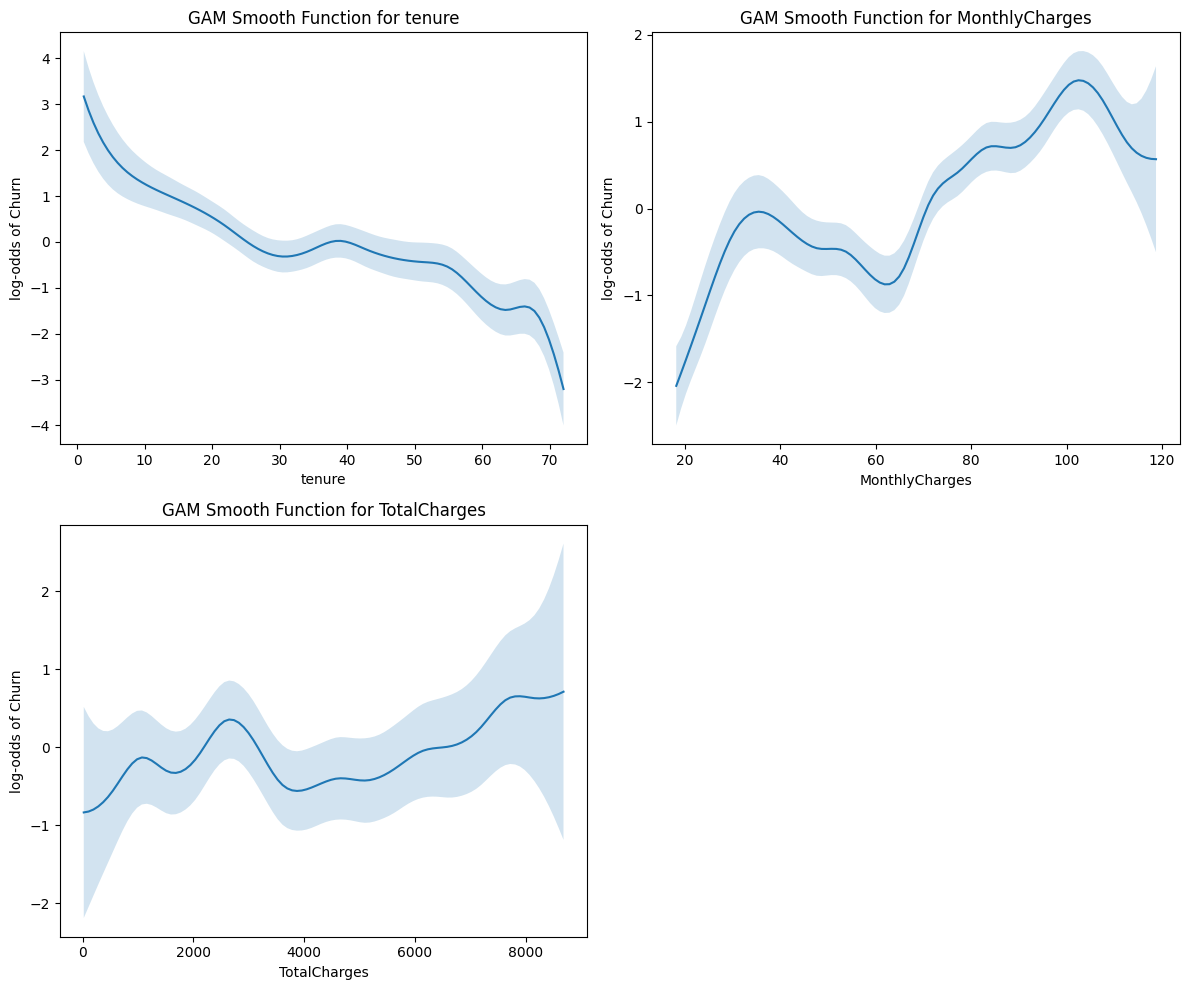

In [99]:
# Smooth Check for 3 numeric variables

X_gam = df[num_var].values
y_gam = df['Churn'].map({'Yes': 1, 'No': 0}).copy()

# Fit GAM with smooth splines
gam = LogisticGAM(s(0) + s(1) + s(2)).fit(X_gam, y_gam)


# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_var):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)
    axes[i].plot(XX[:, i], pdep)
    axes[i].fill_between(XX[:, i], confi[:, 0], confi[:, 1], alpha=0.2)
    axes[i].set_title(f"GAM Smooth Function for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("log-odds of Churn")

axes[3].axis('off')

plt.tight_layout()
plt.show()


The plots show GAM smoonth functions for 3 numeric variables with respect to log-odds of churn, with shaded confidence intervals indicating uncertainty.

Overally, tenure and MonthlyCharges have distinct curves and narrow intervals, so GAM's smooth functions capture non-linear relationships better than linear or logistic regression. For TotalCharges variable, it has wiggly pattern and wide intervals, highly likely due to its collinearity.

Considering the TotalCharge correlation issue exits in all 3 models, I'll remove this variable to improve model stability and reduce high multicollinearity.

Also, the CustomerID variable serves as a unique identifier for each customer and does not provide meaningful predictive information for the churn analysis. Including it in the model could introduce noise or bias, so I'll drop it together with TotalCharges in modelling part.

## 3. Models Build-up

In [100]:
df = df.drop(['customerID', 'TotalCharges'], axis=1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'Churn_num', 'log_odds'],
      dtype='object')

In [101]:
df.describe()

,tenure,MonthlyCharges,Churn_num,log_odds
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.265785,0.265785
std,24.545260,30.085974,0.441782,0.239774
min,1.000000,18.250000,0.000000,0.001859
25%,9.000000,35.587500,0.000000,0.046652
50%,29.000000,70.350000,0.000000,0.203535
75%,55.000000,89.862500,1.000000,0.446458
max,72.000000,118.750000,1.000000,0.863657


In [102]:
num_feature = ['tenure', 'MonthlyCharges']

In [103]:
cat_var

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [104]:
X_cleaned = X_logit_encoded_cleaned.drop(columns=['TotalCharges'])
print(X_cleaned.columns)

Index(['const', 'tenure', 'MonthlyCharges', 'gender_Male', 'SeniorCitizen_1',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [127]:
# Split the cleaned data into train/test sets
y_continuous = df['Churn_num'].copy()  # For linear regression
y_binary = df['Churn'].map({'Yes': 1, 'No': 0}).copy()  # For logistic & GAM


X_train, X_test, y_train_cont, y_test_cont = train_test_split(
    X_cleaned, y_continuous, test_size=0.2, random_state=42, stratify=y_continuous)
_, _, y_train_bin, y_test_bin = train_test_split(
    X_cleaned, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set churn rate: {y_train_bin.mean():.3f}")
print(f"Test set churn rate: {y_test_bin.mean():.3f}")


Training set size: (5625, 21)
Test set size: (1407, 21)
Training set churn rate: 0.266
Test set churn rate: 0.266


### 3.1 Linear Regression

**Instruction**: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

In [128]:
# X_cleaned already has dummy encoding done, just need to remove the constant column for sklearn
X_train_linear = X_train.drop('const', axis=1) if 'const' in X_train.columns else X_train
X_test_linear = X_test.drop('const', axis=1) if 'const' in X_test.columns else X_test

# Standardize features
scaler_linear = StandardScaler()
X_train_linear_scaled = pd.DataFrame(
    scaler_linear.fit_transform(X_train_linear),
    columns=X_train_linear.columns,
    index=X_train_linear.index
)
X_test_linear_scaled = pd.DataFrame(
    scaler_linear.transform(X_test_linear),
    columns=X_test_linear.columns,
    index=X_test_linear.index
)

# Fit linear regression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_linear_scaled, y_train_cont)

# Make predictions
y_pred_train_linear = linear_reg.predict(X_train_linear_scaled)
y_pred_test_linear = linear_reg.predict(X_test_linear_scaled)

# Evaluate performance
train_mse = mean_squared_error(y_train_cont, y_pred_train_linear)
test_mse = mean_squared_error(y_test_cont, y_pred_test_linear)
train_r2 = r2_score(y_train_cont, y_pred_train_linear)
test_r2 = r2_score(y_test_cont, y_pred_test_linear)

print(f"Linear Regression Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Linear Regression Performance:
Training MSE: 0.1412
Test MSE: 0.1463
Training R²: 0.2766
Test R²: 0.2501


In [129]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': linear_reg.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print(f"\nTop 10 Most Important Features (Linear Regression):")
print(feature_importance.head(10)[['Feature', 'Coefficient']])


Top 10 Most Important Features (Linear Regression):
                           Feature  Coefficient
0                           tenure    -0.110199
1                   MonthlyCharges     0.059026
14               Contract_One year    -0.055559
15               Contract_Two year    -0.044867
18  PaymentMethod_Electronic check     0.041709
7      InternetService_Fiber optic     0.039256
11                 TechSupport_Yes    -0.028566
8               OnlineSecurity_Yes    -0.027551
16            PaperlessBilling_Yes     0.023569
3                  SeniorCitizen_1     0.018439


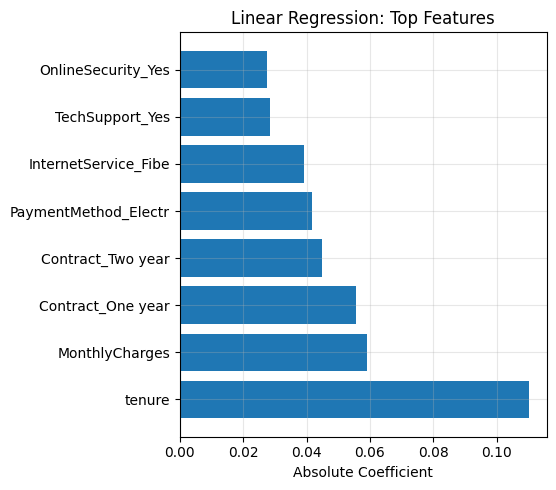

In [150]:
# Feature importance bar plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['Abs_Coefficient'])
plt.yticks(range(len(top_features)), [f[:20] for f in top_features['Feature']])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression: Top Features')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Logistic Regression

**Instruction**: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.


In [130]:
X_train_logistic = X_train.drop('const', axis=1) if 'const' in X_train.columns else X_train
X_test_logistic = X_test.drop('const', axis=1) if 'const' in X_test.columns else X_test

# Standardize features for better convergence
scaler_logistic = StandardScaler()
X_train_logistic_scaled = pd.DataFrame(
    scaler_logistic.fit_transform(X_train_logistic),
    columns=X_train_logistic.columns,
    index=X_train_logistic.index
)
X_test_logistic_scaled = pd.DataFrame(
    scaler_logistic.transform(X_test_logistic),
    columns=X_test_logistic.columns,
    index=X_test_logistic.index
)

# Fit logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train_logistic_scaled, y_train_bin)

# Make predictions
y_pred_train_logistic = logistic_reg.predict(X_train_logistic_scaled)
y_pred_test_logistic = logistic_reg.predict(X_test_logistic_scaled)
y_pred_proba_test_logistic = logistic_reg.predict_proba(X_test_logistic_scaled)[:, 1]

# Evaluate performance
train_accuracy = accuracy_score(y_train_bin, y_pred_train_logistic)
test_accuracy = accuracy_score(y_test_bin, y_pred_test_logistic)

print(f"Logistic Regression Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test_bin, y_pred_test_logistic,
                          target_names=['No Churn', 'Churn']))

print(f"\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test_bin, y_pred_test_logistic))

Logistic Regression Performance:
Training Accuracy: 0.8000
Test Accuracy: 0.7996

Classification Report (Test Set):
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1033
       Churn       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix (Test Set):
[[923 110]
 [172 202]]


In [131]:
# Feature importance (coefficients)
feature_importance_logistic = pd.DataFrame({
    'Feature': X_train_logistic.columns,
    'Coefficient': logistic_reg.coef_[0],
    'Odds_Ratio': np.exp(logistic_reg.coef_[0])
})
feature_importance_logistic['Abs_Coefficient'] = abs(feature_importance_logistic['Coefficient'])
feature_importance_logistic = feature_importance_logistic.sort_values('Abs_Coefficient', ascending=False)

print(f"\nTop 10 Most Important Features (Logistic Regression):")
print(feature_importance_logistic.head(10)[['Feature', 'Coefficient', 'Odds_Ratio']])


Top 10 Most Important Features (Logistic Regression):
                           Feature  Coefficient  Odds_Ratio
0                           tenure    -0.801546    0.448635
15               Contract_Two year    -0.661236    0.516213
14               Contract_One year    -0.349674    0.704918
7      InternetService_Fiber optic     0.286722    1.332053
1                   MonthlyCharges     0.285752    1.330763
18  PaymentMethod_Electronic check     0.208973    1.232412
16            PaperlessBilling_Yes     0.172618    1.188412
8               OnlineSecurity_Yes    -0.167745    0.845570
11                 TechSupport_Yes    -0.155929    0.855620
12                 StreamingTV_Yes     0.126873    1.135273


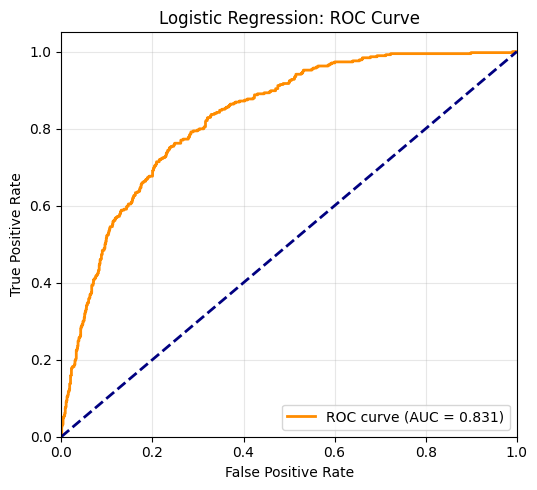

In [149]:
# ROC Curve
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba_test_logistic)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression: ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Generalized Additive Model (GAM)

**Instruction**: Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

In [137]:
# For GAM, we need to separate numerical and categorical features from X_cleaned
numerical_features_in_cleaned = ['tenure', 'MonthlyCharges']
categorical_features_in_cleaned = [col for col in X_train.columns
                                 if col not in numerical_features_in_cleaned and col != 'const']

print(f"Numerical features for GAM: {numerical_features_in_cleaned}")
print(f"Number of categorical features: {categorical_features_in_cleaned}")

Numerical features for GAM: ['tenure', 'MonthlyCharges']
Number of categorical features: ['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [138]:
# Prepare numerical features (these will have smooth terms)
X_train_gam_num = X_train[numerical_features_in_cleaned].values
X_test_gam_num = X_test[numerical_features_in_cleaned].values

# Prepare categorical features (these will have factor terms)
# The categorical features in X_cleaned are already dummy encoded (0/1)
X_train_gam_cat = X_train[categorical_features_in_cleaned].values
X_test_gam_cat = X_test[categorical_features_in_cleaned].values

# Combine numerical and categorical features
X_train_gam_full = np.concatenate([X_train_gam_num, X_train_gam_cat], axis=1)
X_test_gam_full = np.concatenate([X_test_gam_num, X_test_gam_cat], axis=1)

print(f"GAM training data shape: {X_train_gam_full.shape}")

GAM training data shape: (5625, 20)


In [141]:
# Smooth terms for numerical features
for i in range(len(numerical_features_in_cleaned)):
    gam_terms.append(s(i))

# For categorical dummy variables, we'll use linear terms but properly wrapped
# Since pygam requires Term objects, we'll import the linear term
from pygam.terms import LinearTerm

# Linear terms for categorical dummy variables (since they're already 0/1)
for i in range(len(numerical_features_in_cleaned), X_train_gam_full.shape[1]):
    gam_terms.append(LinearTerm(i))  # Proper linear term wrapper

# Combine all terms
if len(gam_terms) > 1:
    gam_formula = gam_terms[0]
    for term in gam_terms[1:]:
        gam_formula += term
else:
    gam_formula = gam_terms[0]

In [143]:
gam_model = LogisticGAM(gam_formula, max_iter=100)
gam_model.fit(X_train_gam_full, y_train_bin)

# Make predictions
y_pred_train_gam = gam_model.predict(X_train_gam_full)
y_pred_test_gam = gam_model.predict(X_test_gam_full)
y_pred_proba_test_gam = gam_model.predict_proba(X_test_gam_full)

# Evaluate performance
train_accuracy_gam = accuracy_score(y_train_bin, y_pred_train_gam)
test_accuracy_gam = accuracy_score(y_test_bin, y_pred_test_gam)

print(f"GAM Performance:")
print(f"Training Accuracy: {train_accuracy_gam:.4f}")
print(f"Test Accuracy: {test_accuracy_gam:.4f}")

# Get model statistics
print(f"AIC: {gam_model.statistics_['AIC']:.2f}")
print(f"Deviance: {gam_model.statistics_['deviance']:.2f}")
print(f"Scale: {gam_model.statistics_['scale']:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test_bin, y_pred_test_gam,
                            target_names=['No Churn', 'Churn']))

print(f"\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test_bin, y_pred_test_gam))


GAM Performance:
Training Accuracy: 0.8119
Test Accuracy: 0.7960
AIC: 4609.41
Deviance: 4522.68
Scale: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1033
       Churn       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix (Test Set):
[[920 113]
 [174 200]]


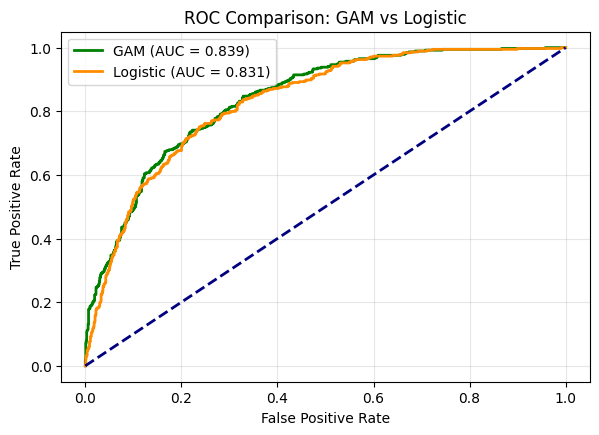

In [156]:
# ROC comparison plot

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)

# GAM ROC
fpr_gam, tpr_gam, _ = roc_curve(y_test_bin, y_pred_proba_test_gam)
roc_auc_gam = auc(fpr_gam, tpr_gam)
plt.plot(fpr_gam, tpr_gam, color='green', lw=2, label=f'GAM (AUC = {roc_auc_gam:.3f})')

# Logistic ROC for comparison
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison: GAM vs Logistic')
plt.legend()
plt.grid(True, alpha=0.3)




## 4. Model Evaluation and Comparison

### 4.1 Model Performance Comparison

The key performance metrics of 3 models are summarized below:

| Model              | Primary Metric(s)             | Test Performance                               |
|--------------------|--------------------------------|-----------------------------------------------|
| Linear Regression  | MSE / R²                      | MSE: 0.1463<br>R²: 0.2501                      |
| Logistic Regression| Accuracy / AUC / F1 (weighted)| Accuracy: 79.96%<br>AUC: 0.831<br>F1: 0.79     |
| GAM                | Accuracy / AUC / F1 (weighted)| Accuracy: 79.60%<br>AUC: 0.839<br>F1: 0.79     |




*   Linear Regression Model's explanatory power is very low, with R² being only 0.25, meaning it can only explain around 25% of variance.
*   Logistic Regression Model achieves the highest accuracy 79.96%, AUC slightly lower than GAM's.
*   GAM edges out Logistic in discriminative power (AUC), althought its accuracy slightly lower than Logistic's.



### 4.2 Interpretability Comparison

Linear and Logistic are simplest for quick insights (e.g., via coefficient tables). GAM adds nuance via smooth functions but may require visualization for non-experts.


| Model              | Interpretability Level         | Key Interpretation Tools                                                                 | Strengths in Interpretation                                                                                           |
|--------------------|--------------------------------|------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| Linear Regression  | High (linear coefficients)     | Coefficients (e.g., tenure: -0.11,<br>meaning +1 tenure decreases predicted churn<br>by 0.11 units) | Direct: Each feature's impact is constant<br>and additive. Top features (e.g., longer tenure<br>reduces churn) align with business intuition. |
| Logistic Regression| High (log-odds & odds ratios)  | Odds ratios (e.g., tenure OR: 0.45,<br>a 1-unit increase halves churn odds);<br>partial effects linear. | Business-friendly: "Fiber optic service<br>increases churn odds by 33%."<br>Coefficients highlight drivers like contract length. |
| GAM                | Medium-High (partial effects)  | Smooth terms for numerical features<br>(e.g., non-linear tenure effect);<br>linear terms for categoricals. | Reveals non-linearities (e.g., tenure's impact may plateau);<br>still additive, but requires plots for full nuance. |



### 4.3 Strengths and Weaknesses of Each Approach

Linear Regression

* Strengths: simple and easy to train/fit and interpret;

* Weaknesses: its assumption of linear relationships limits its use in real life because many relationships in reality is not linear. Also, in out case, its prediction ability is poor.

Logistic Regression

* Strengths: very suitable for binary outcomes; still interpretable via odds ratios; handles multicollinearity well and is robust to moderate non-linearity. In our case, logistic regression has the best accuracy.

* Weaknesses: Assumes linear log-odds (may underperform if strong non-linearities exist); sensitive to outliers.


Generalized Additive Model (GAM)

* Strengths: can captures non-linear effects while keeping additivity for interpretability. In our case, GAM has slightly better AUC, suggesting its improved fit for complex patterns, its AIC also indicates good balance of fit and complexity.

* Weaknesses: more computationally intensive; interpretability requires additional tools and explanation; risk of overfitting if smooth terms are too flexible.



### 4.4 Recommendations for Tele Company

In our case, churn is more a binary problem.
* My 1st recommendation is to use Logistic regression because it offers excellent balance: ~80% accuracy, strong AUC (0.831), and straightforward odds-ratio interpretations.
* My 2nd suggestion would be GAM. If analysis reveals non-linear patterns, switch to GAM for a ~1% AUC gain. It's ideal for deeper insights, like tailoring offers based on tenure thresholds, but requires more expertise for deployment.
* I won't suggest using Linear Regression Model in our case because of its low R² and mismatch with the outcome type.